In [9]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
data=pd.read_csv('car_data.csv',encoding='gbk')

In [17]:
data.head()

,地区,人均GDP,城镇人口比重,交通工具消费价格指数,百户拥有汽车量,聚类结果
0,北京,8.05,86.20,95.92,37.71,1
1,天津,8.34,80.50,103.57,20.62,3
2,河北,3.39,45.60,99.03,23.32,2
3,山西,3.13,49.68,98.96,18.60,2
4,内蒙古,5.79,56.62,99.11,19.62,1


In [11]:
# 选取维度
train_x=data[['人均GDP','城镇人口比重','交通工具消费价格指数','百户拥有汽车量']]

In [12]:
# 规范化
min_max_scaler=preprocessing.MinMaxScaler()
train_x=min_max_scaler.fit_transform(train_x)

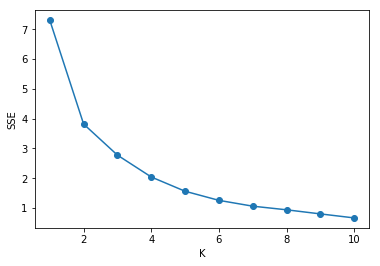

In [13]:
# K-Means 手肘法：
# 统计不同K取值的误差平方和
sse = []
for k in range(1, 11):
    # kmeans算法
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(train_x)
    # 计算inertia簇内误差平方和
    sse.append(kmeans.inertia_)
x = range(1, 11)
plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(x, sse, 'o-')
plt.show()

In [14]:
# 使用KMeans聚类 k选3或4
kmeans=KMeans(n_clusters=4)
kmeans.fit(train_x)
predict_y=kmeans.predict(train_x)

In [15]:
# 预测结果:
predict_y

array([1, 3, 2, 2, 1, 0, 2, 0, 3, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 2, 2, 0, 0, 0, 0, 0])

In [16]:
# 增加结果咧
data['聚类结果']= predict_y

![title](https://s1.ax1x.com/2020/07/07/UAOKDs.jpg)

In [34]:
# 存入csv
data.to_csv('result.csv')